# Informe: Hito 2

## Spotify Charts (All Audio Data)

Integrantes:

1) Diego Opazo
2) Diego Soto
3) Nadia Decar
4) Francisco Gutiérrez
5) Vicente Soto

### Motivación:

Las personas, en general, dedican una parte significativa de su tiempo a escuchar música de diversos tipos y géneros en una amplia variedad de contextos. Esta práctica se manifiesta en situaciones tan variadas como durante los viajes, en el entorno laboral, mientras estudian, en celebraciones festivas, y en muchos otros momentos de su rutina diaria. A través de esta interacción constante con la música, se genera una abundante cantidad de información valiosa. Por ejemplo, se pueden identificar cuáles son los artistas más escuchados, qué géneros musicales predominan entre los oyentes, y otras estadísticas relevantes que permiten conocer en detalle los hábitos musicales de las personas.

El análisis de esta información no solo revela datos sobre las preferencias musicales actuales, sino que también ofrece la oportunidad de explorar y responder preguntas más profundas sobre las tendencias en la música. Además, resulta interesante la posibilidad de estudiar las características que son recurrentes en las canciones que alcanzan gran popularidad. Comprender estos patrones y elementos comunes en las canciones exitosas puede proporcionar valiosas pistas sobre las tendencias emergentes, así como sobre las preferencias y comportamientos de los oyentes. En resumen, la música no solo enriquece las vidas, sino que también ofrece una ventana para explorar y comprender mejor las dinámicas culturales y sociales a través de los datos que genera.


### Exploración de datos:

El dataset escogido fue extraído de Kaggle y contiene información de la plataforma Spotify acerca de las canciones que componen el top de canciones más escuchadas por usuarios de distintos países en un intervalo de tiempo desde el 2017 hasta el 2020. Este consta de 26 millones de tuplas y contiene 29 atributos. Entre los más importantes se encuentran: título de la pista, artista, popularidad, ranking, región, información que caracteriza a una canción (duración, sonoridad, danzabilidad, nota musical, etc.)

Al momento de realizar el análisis exploratorio se decidió tomar los top 200 del año 2020, y de este subset se tomaron solo los top 50. Este proceso se hizo mediante iteraciones a distintas combinaciones, con estos filtros se obtenían más de 1.200.000 de filas, por lo que se aplicó un random para quitar algunos días, dejando de esta forma el dataset en aproximadamente 1.000.000 de filas.

In [2]:
# %pip install pandas
# %pip install openpyxl
# %pip install seaborn
# %pip install matplotlib --user
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mediante una exploración por encima del data set, se encontró que los valores no estaban estandarizados y que eso podría afectar en el desarrollo futuro, por lo que a continuación se realizan distintas modifcaciones con el fin de hacer que atributos sea manejables. 

In [3]:
df_spotify = pd.read_excel('Spotify.xlsx')

#Ajustamos columnas para contraarrestar error de formato en archivo xlsx
df_spotify['duration_ms'] = df_spotify['duration_ms']/10
df_spotify['popularity'] = df_spotify['popularity']/10
df_spotify['streams'] = df_spotify['streams']/10
df_spotify['af_danceability'] = df_spotify['af_danceability']/1000
df_spotify['af_energy'] = df_spotify['af_energy']/1000
df_spotify['af_key'] = df_spotify['af_key']/10
df_spotify['af_loudness'] = df_spotify['af_loudness']/1000
df_spotify['af_speechiness'] = df_spotify['af_speechiness']/1000
df_spotify['af_acousticness'] = df_spotify['af_acousticness']/1000
df_spotify['af_instrumentalness'] = df_spotify['af_instrumentalness']/1000
df_spotify['af_liveness'] = df_spotify['af_liveness']/1000
df_spotify['af_valence'] = df_spotify['af_valence']/1000
df_spotify['af_tempo'] = df_spotify['af_tempo']/1000
df_spotify['af_time_signature'] = df_spotify['af_time_signature']/10

In [3]:
df_spotify.shape
#Contiene 1.009.050 tuplas

(1009050, 31)

El dataset filtrado contiene un total de 1.009.050 tuplas.

In [4]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009050 entries, 0 to 1009049
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Column1              1009050 non-null  int64         
 1   title                1009050 non-null  object        
 2   rank                 1009050 non-null  int64         
 3   date                 1009050 non-null  datetime64[ns]
 4   artist               1009050 non-null  object        
 5   url                  1009050 non-null  object        
 6   region               1009050 non-null  object        
 7   chart                1009050 non-null  object        
 8   trend                1009050 non-null  object        
 9   streams              1009050 non-null  float64       
 10  track_id             1009050 non-null  object        
 11  album                1007770 non-null  object        
 12  popularity           1009050 non-null  float64       
 1

Se puede apreciar que el data set en su mayoría esta compuesto por valores numéricos. 

In [7]:
df_spotify.head()

,Column1,title,rank,date,artist,url,region,chart,trend,streams,...,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature,Año,Día
0,20427,Hei rakas,13,2020-05-01,BEHM,https://open.spotify.com/track/0tc8HGXosQDC8TT...,Finland,top200,MOVE_UP,28838.0,...,0,0.282,0.043,1.520000e-07,0.135,0.251,115.024,4.0,2020,1
1,28645,GOOBA,9,2020-06-01,6ix9ine,https://open.spotify.com/track/4NhDYoQTYCdWHTv...,Austria,top200,MOVE_DOWN,22249.0,...,10,0.341,0.264,0.000000e+00,0.251,0.393,178.462,4.0,2020,1
2,65919,Favorito,1,2020-05-01,Camilo,https://open.spotify.com/track/0jT8Nl0shPS8115...,Argentina,top200,SAME_POSITION,218751.0,...,10,0.545,0.237,0.000000e+00,0.251,0.822,178.043,4.0,2020,1
3,65920,Yo Perreo Sola,2,2020-05-01,Bad Bunny,https://open.spotify.com/track/0SqqAgdovOE24Bz...,Argentina,top200,SAME_POSITION,193855.0,...,10,0.695,0.021,6.540000e-06,0.344,0.453,97.014,4.0,2020,1
4,65921,PORFA,3,2020-05-01,"Feid, Justin Quiles",https://open.spotify.com/track/4TOmcZvw0gHa7Gi...,Argentina,top200,SAME_POSITION,179042.0,...,0,0.193,0.903,0.000000e+00,0.117,0.055,167.823,4.0,2020,1


In [8]:
df_spotify.describe()

,Column1,rank,date,streams,popularity,duration_ms,release_date,af_danceability,af_energy,af_key,...,af_mode,af_speechiness,af_acousticness,af_instrumentalness,af_liveness,af_valence,af_tempo,af_time_signature,Año,Día
count,1.009050e+06,1.009050e+06,1009050,1.009050e+06,1.009050e+06,1.009050e+06,1007770,1.009050e+06,1.009050e+06,1.009050e+06,...,1.009050e+06,1.009050e+06,1.009050e+06,1.009050e+06,1.009050e+06,1.009050e+06,1.009050e+06,1.009050e+06,1009050.0,1.009050e+06
mean,1.188392e+07,2.550031e+01,2020-07-03 01:55:45.821911040,1.015967e+05,5.476770e+01,2.020789e+05,2019-07-11 05:05:01.690266880,6.322074e-01,5.785047e-01,5.500868e+00,...,5.413983e+00,4.013388e-01,3.612143e-01,6.002387e-02,3.664502e-01,5.126370e-01,1.138380e+02,3.981612e+00,2020.0,1.576358e+01
min,2.042700e+04,1.000000e+00,2020-01-01 00:00:00,1.001000e+03,0.000000e+00,0.000000e+00,1942-01-01 00:00:00,2.000000e-03,1.000000e-03,0.000000e+00,...,0.000000e+00,1.000000e-03,0.000000e+00,0.000000e+00,1.000000e-03,1.000000e-03,7.260000e-01,1.000000e+00,2020.0,1.000000e+00
25%,9.170925e+06,1.300000e+01,2020-04-02 00:00:00,6.672000e+03,4.300000e+01,1.740000e+05,2019-10-25 00:00:00,5.610000e-01,4.910000e-01,2.000000e+00,...,0.000000e+00,1.930000e-01,1.490000e-01,0.000000e+00,1.130000e-01,3.430000e-01,9.399900e+01,4.000000e+00,2020.0,9.000000e+00
50%,1.455074e+07,2.600000e+01,2020-07-05 00:00:00,1.935700e+04,6.500000e+01,1.977210e+05,2020-02-29 00:00:00,7.070000e-01,6.280000e-01,6.000000e+00,...,1.000000e+01,3.670000e-01,2.810000e-01,0.000000e+00,2.040000e-01,5.390000e-01,1.169340e+02,4.000000e+00,2020.0,1.500000e+01
75%,1.629492e+07,3.800000e+01,2020-10-02 00:00:00,7.951500e+04,7.500000e+01,2.210240e+05,2020-06-17 00:00:00,7.930000e-01,7.320000e-01,9.000000e+00,...,1.000000e+01,5.730000e-01,5.460000e-01,3.437500e-06,6.930000e-01,7.020000e-01,1.430780e+02,4.000000e+00,2020.0,2.400000e+01
max,1.870400e+07,5.000000e+01,2020-12-31 00:00:00,1.722324e+07,9.000000e+01,7.785980e+05,2021-12-21 00:00:00,9.790000e-01,9.920000e-01,1.100000e+01,...,1.000000e+01,9.990000e-01,9.990000e-01,9.990000e-01,9.990000e-01,9.980000e-01,2.300260e+02,5.000000e+00,2020.0,3.100000e+01
std,5.200886e+06,1.443084e+01,NaN,3.470239e+05,2.752928e+01,4.295728e+04,NaN,2.405269e-01,2.262610e-01,3.697502e+00,...,4.982835e+00,2.528025e-01,2.595275e-01,1.613910e-01,3.173933e-01,2.477951e-01,4.314975e+01,2.542789e-01,0.0,8.809509e+00


Dado lo anterior, el valor promedio de duración en minutos es de 3.36 minutos.

In [9]:
# Conteo de valores únicos por columna
df_spotify.nunique()

Column1                1009050
title                    10261
rank                        50
date                       306
artist                    5701
url                      11621
region                      68
chart                        1
trend                        4
streams                 243681
track_id                 11621
album                     7227
popularity                  91
duration_ms               9482
explicit                     2
release_date              1274
available_markets          286
af_danceability            753
af_energy                  850
af_key                      12
af_loudness               6413
af_mode                      2
af_speechiness             891
af_acousticness            900
af_instrumentalness       1966
af_liveness                894
af_valence                 886
af_tempo                  8738
af_time_signature            4
Año                          1
Día                         26
dtype: int64

In [11]:
# Verificar valores nulos
print(df_spotify.isnull().sum())

Column1                   0
title                     0
rank                      0
date                      0
artist                    0
url                       0
region                    0
chart                     0
trend                     0
streams                   0
track_id                  0
album                  1280
popularity                0
duration_ms               0
explicit                  0
release_date           1280
available_markets         0
af_danceability           0
af_energy                 0
af_key                    0
af_loudness               0
af_mode                   0
af_speechiness            0
af_acousticness           0
af_instrumentalness       0
af_liveness               0
af_valence                0
af_tempo                  0
af_time_signature         0
Año                       0
Día                       0
dtype: int64


In [ ]:
df_spotify['af_valence'].mean()

np.float64(0.5126370150141223)

Adicionalmente:

La columna “af_valence” mide la positividad de una canción, en donde valores altos (1) representan canciones "alegres" y valores bajos (0) canciones "tristes". Al calcular el promedio se obtiene un valor medio esperado de (~ 0.512), sugiriendo que hay una variedad de emociones, y que las canciones no tienden a ser únicamente "tristes" o "felices".


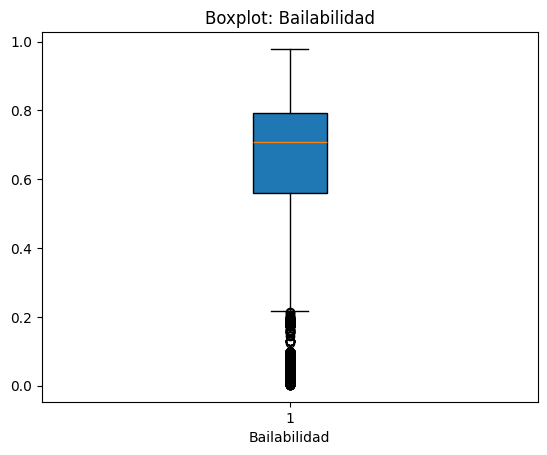

In [12]:
#Boxplot de bailabilidad

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.boxplot(df_spotify['af_danceability'], patch_artist=True)
ax.set_title('Boxplot: Bailabilidad')
ax.set_xlabel('Bailabilidad')

plt.show()


La columna “af_danceability” representa qué tan adecuada es la canción para bailar, basado en elementos como el ritmo, estabilidad, beats, etc. Al analizar el gráfico, se observa que la mayoría de las canciones son aptas para bailar. Para explorar un poco más en detalle este atributo, se decide separar las regiones en continentes para visualizar la bailabilidad.

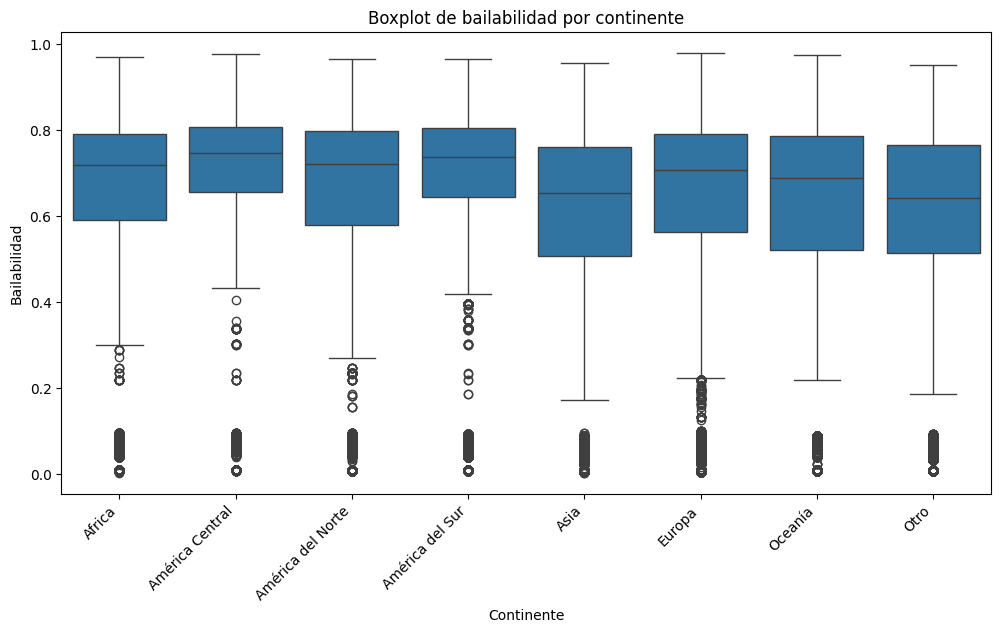

In [14]:
def asignar_continente(region):
  """Asigna el continente a una región."""
  if region in ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']:
    return 'América del Sur'
  elif region in ['Canada', 'Mexico', 'United States']:
    return 'América del Norte'
  elif region in ['Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama']:
    return 'América Central'
  elif region in ['Finland', 'Austria', 'Belgium', 'Bulgaria', 'Czech Republic', 'Denmark', 'Estonia', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Russia']:
    return 'Europa'
  elif region in ['Australia', 'New Zealand']:
    return 'Oceanía'
  elif region in ['Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Taiwan', 'Thailand', 'Turkey', 'United Arab Emirates', 'Vietnam']:
    return 'Asia'
  elif region in ['Egypt', 'Morocco', 'South Africa']:
    return 'Africa'
  else:
    return 'Otro'
# Aplica la función a la columna 'region' y crea una nueva columna 'continente'
df_spotify['continente'] = df_spotify['region'].apply(asignar_continente)

plt.figure(figsize=(12, 6))
sns.boxplot(x='continente', y='af_danceability', data=df_spotify,  order=sorted(df_spotify['continente'].unique()))
plt.title('Boxplot de bailabilidad por continente')
plt.xlabel('Continente')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Bailabilidad')
plt.show()

Con esto se puede apreciar el promedio aproximado de la bailabilidad de las canciones del top 50 en los distintos continentes. A partir de esto, se puede observar que el promedio de "bailabilidad" de Asia está por debajo del resto de los continentes, mientras que el más alto se encuentra entre América del Sur y América Central.

In [ ]:
#Buscando el artista mas repetido en las mediciones del top
df_spotify['artist'].value_counts().sort_values(ascending=False)

artist
The Weeknd          22985
Bad Bunny           19264
Dua Lipa            18741
Justin Bieber       14327
J Balvin            13983
                    ...  
Samantha Jade           1
Suikon Blaz AD          1
Smolasty, Szpaku        1
Usher                   1
JAZN, Veysel            1
Name: count, Length: 5701, dtype: int64

Considerando todas las mediciones en el top 50, y de todos los países, el artista que más veces ha aparecido es "The Weeknd"

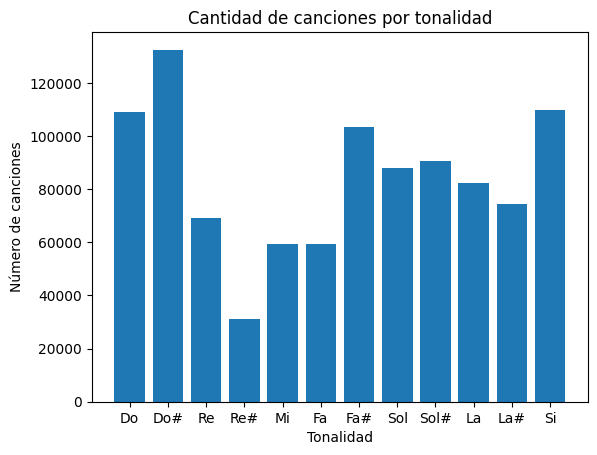

In [ ]:
df_keys = df_spotify["af_key"]
keys = df_keys.value_counts().sort_index()

fig, ax = plt.subplots()

ax.bar(keys.index, keys)

labels = ["Do", "Do#", "Re", "Re#", "Mi", "Fa", "Fa#", "Sol", "Sol#", "La", "La#", "Si"]
ax.set_xticks(keys.index) 
ax.set_xticklabels(labels)

plt.title("Cantidad de canciones por tonalidad")
ax.set_ylabel("Número de canciones")
ax.set_xlabel("Tonalidad")

plt.show()

Gráfico que representa la distribución de canciones por su tonalidad. Las notas parten en Do, que es 0, y terminan en Si, que es 11.

La columna af_key representa la nota o tonalidad que define una canción. Se puede notar una prevalencia en la tonalidad de Do# por sobre el resto y Re# como la menos común, mientras que el resto tiene valores bastante cercanos entre sí.


In [ ]:
#agrupamos por titulo, y sacamos promedio de streams
df_title_streams_promedio = df_spotify.groupby('title').agg({'streams': 'mean', 'af_valence': 'first'}).sort_values(by='streams', ascending=False).reset_index()
df_title_streams_promedio

,title,streams,af_valence
0,Winter Wonderland - Remastered,1180886.5,0.053
1,Lovin’ Me (feat. Phoebe Bridgers),1099383.0,0.167
2,Silver Bells,1074418.0,0.606
3,"You're A Mean One, Mr. Grinch - From Dr. Seuss...",1032943.0,0.437
4,Cool Yule,997527.0,0.707
...,...,...,...
10256,Until We Die,1192.0,0.078
10257,Bayen Habeit,1149.0,0.779
10258,Heartless - Vapor Wave Remix,1137.0,0.172
10259,Chuzhda,1126.6,0.932


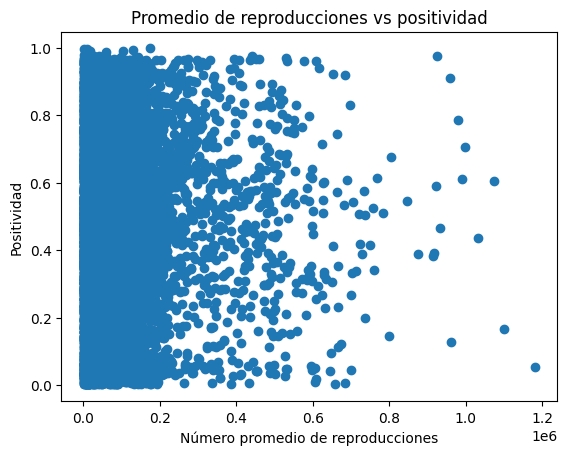

In [ ]:
#Grafico de dispersion entre streams y positividad
import matplotlib.pyplot as plt

streams = df_title_streams_promedio["streams"]
positividad = df_title_streams_promedio["af_valence"]

plt.scatter(streams, positividad)

plt.xlabel('Número promedio de reproducciones')
plt.ylabel('Positividad')
plt.title('Promedio de reproducciones vs positividad')

plt.show()


El grafico anterior muestra la dispersión de la positividad de las canciones, en base al número promedio de reproducciones o streams.

Notamos que tienden a haber muchas canciones con un número igual o menor a 2.000.000 de reproducciones, pero no se distingue a priori una correlación o tendencia clara entre ambos atributos.

In [ ]:
#Agrupamos por titulo y sacamos promedio de popularidad
df_title_pop_promedio = df_spotify.groupby('title').agg({'popularity': 'mean', 'af_valence': 'first'}).sort_values(by='popularity', ascending=False).reset_index()
df_title_pop_promedio

,title,popularity,af_valence
0,Sweater Weather,89.0,0.398
1,Someone You Loved,89.0,0.446
2,Say You Won't Let Go,88.0,0.494
3,goosebumps,88.0,0.043
4,Believer,88.0,0.666
...,...,...,...
10256,Perişanım,0.0,0.357
10257,Perspektive,0.0,0.768
10258,Tu,0.0,0.876
10259,Blitz,0.0,0.743


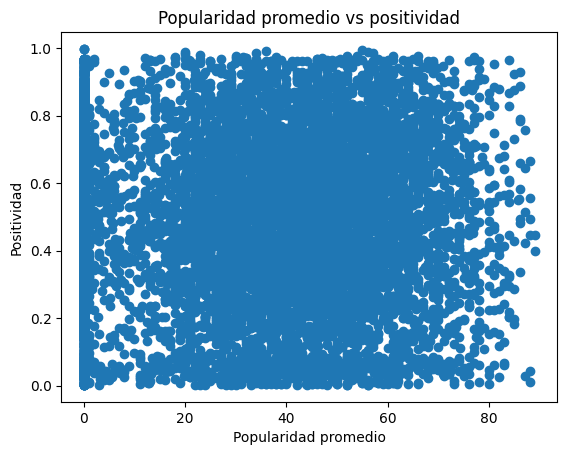

In [ ]:
#Grafico de dispersion entre popularidad y positividad
import matplotlib.pyplot as plt

popularidad = df_title_pop_promedio["popularity"]
positividad = df_title_pop_promedio["af_valence"]

plt.scatter(popularidad, positividad)

plt.xlabel('Popularidad promedio')
plt.ylabel('Positividad')
plt.title('Popularidad promedio vs positividad')

plt.show()


El gráfico anterior muestra la dispersión de la positividad de las canciones, en base al valor de popularidad promedio.

Se observa que los valores tienden a aglutinarse en el centro, pero no hay una correlación o relación clara que se pueda extraer de estos atributos.

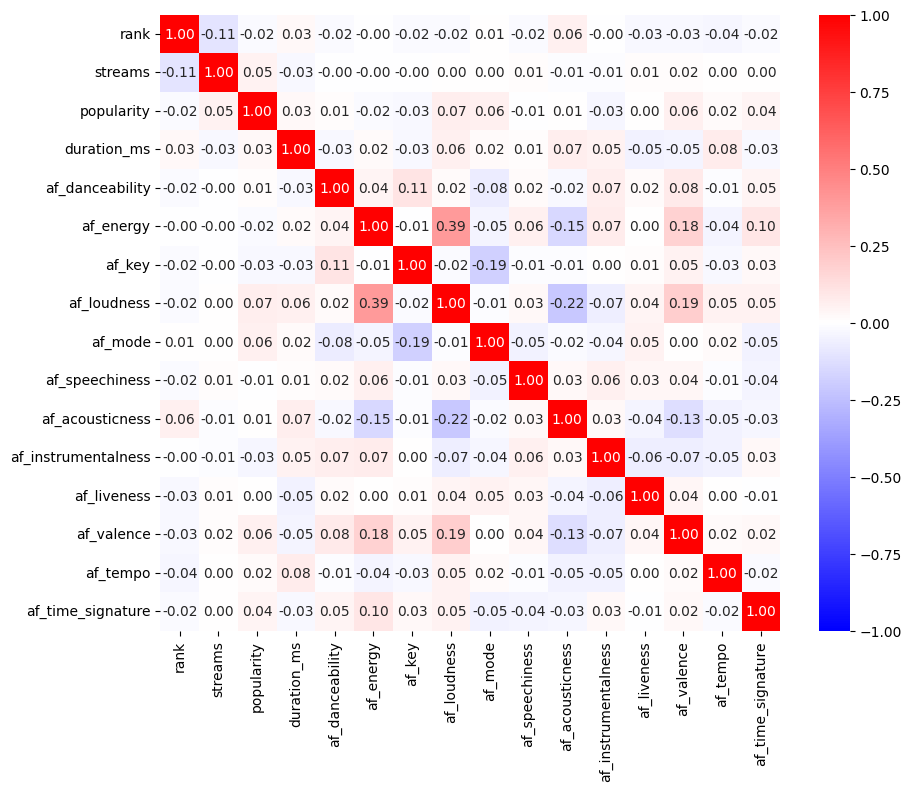

In [ ]:
#Matriz de correlacion
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(df_spotify[['rank', 'streams', 'popularity', 'duration_ms', 'af_danceability', 'af_energy', 'af_key', 'af_loudness', 'af_mode', 'af_speechiness', 'af_acousticness', 'af_instrumentalness', 'af_liveness', 'af_valence', 'af_tempo', 'af_time_signature']].corr(), annot=True, fmt='.2f', vmin=-1, cmap='bwr', ax=ax)
plt.show()

La anterior es la matriz de correlación para los valores numéricos del dataset.

Se observa que no existe una correlación lineal clara entre la mayoría de las tuplas de atributos. Sin embargo, el caso de af_loudness y af_energy puede ser interesante, ya que presenta un índice de correlación ligeramente superior.

Esto sugiere que el volumen o intensidad auditiva de una canción está relacionado con su nivel de energía, lo cual tiene sentido a priori.

Se procederá a analizar este caso en más detalle.

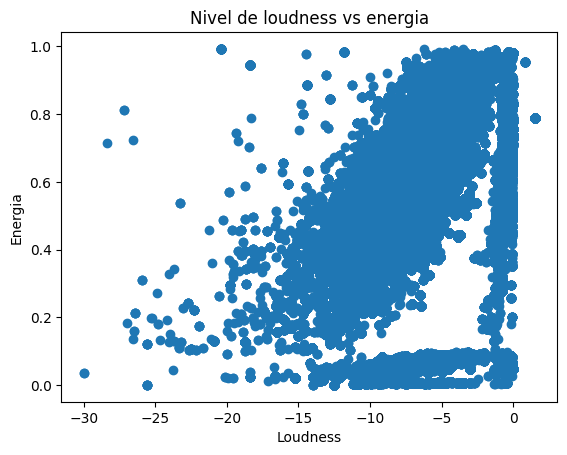

In [ ]:
#Grafico de dispersion entre loudness y energia
import matplotlib.pyplot as plt
import numpy as np

loudness = df_spotify["af_loudness"]
energy = df_spotify["af_energy"]

plt.scatter(loudness, energy)

plt.xlabel('Loudness')
plt.ylabel('Energia')
plt.title('Nivel de loudness vs energia')

plt.show()

Del gráfico anterior se observa que, salvo un grupo de canciones que tienen un valor de energía o loudness igual o cercano a cero (probablemente placeholders o información faltante), existe una correlación lineal visible para el cúmulo de valores central, lo cual, como se había indicado, tiene cierto sentido.

In [ ]:
from matplotlib import pyplot as plt

df_title_streams_promedio['streams'].plot(kind='hist', bins=20, title='streams')
plt.gca().spines[['top', 'right',]].set_visible(False)

Se elabora un histograma que representa la cantidad de streams que tienen las canciones, lo que permite observar que hay pocas canciones que superan las 400,000 reproducciones, pero que de todas formas están dentro del top 50.

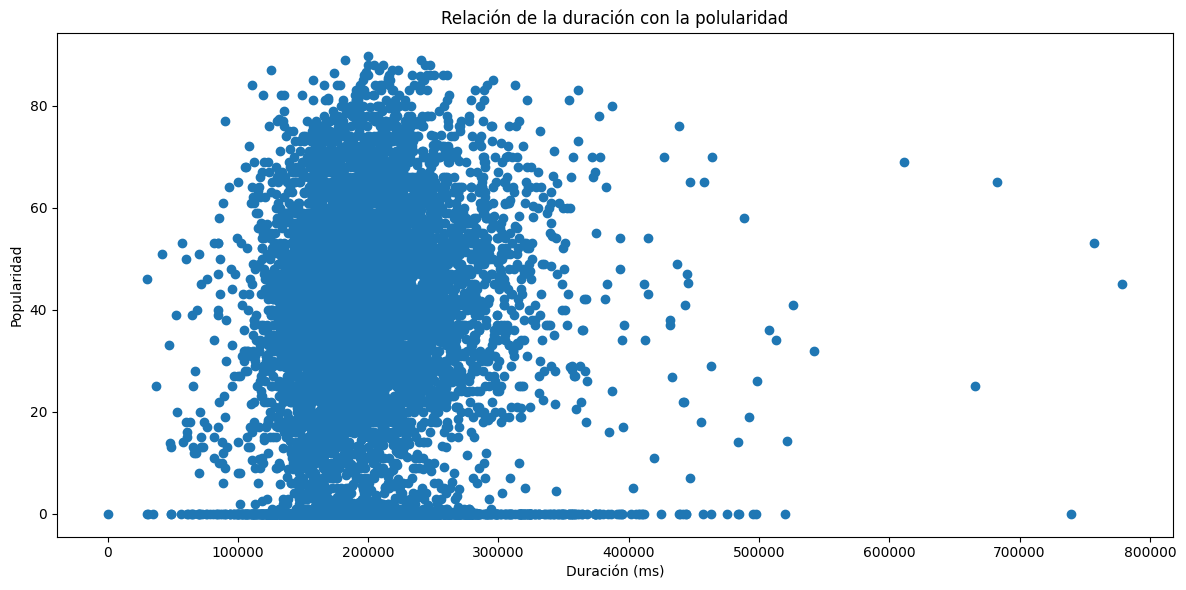

In [ ]:
df_spotify["streams_log"] = np.log(df_spotify["streams"])
df_spotify_duracion = df_spotify.groupby('duration_ms').agg({'popularity': 'mean', 'streams': 'mean', 'streams_log': 'mean'}).sort_values(by='duration_ms', ascending=False).reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(x='duration_ms', y='popularity', data=df_spotify_duracion)
plt.title('Relación de la duración con la popularidad')
plt.xlabel('Duración (ms)')
plt.ylabel('Popularidad')
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se solapen
plt.show()

Se puede apreciar que una gran cantidad de las canciones que se encuentran en el top 50, tienen una duración entre el minuto y los 3 minutos y medio. 

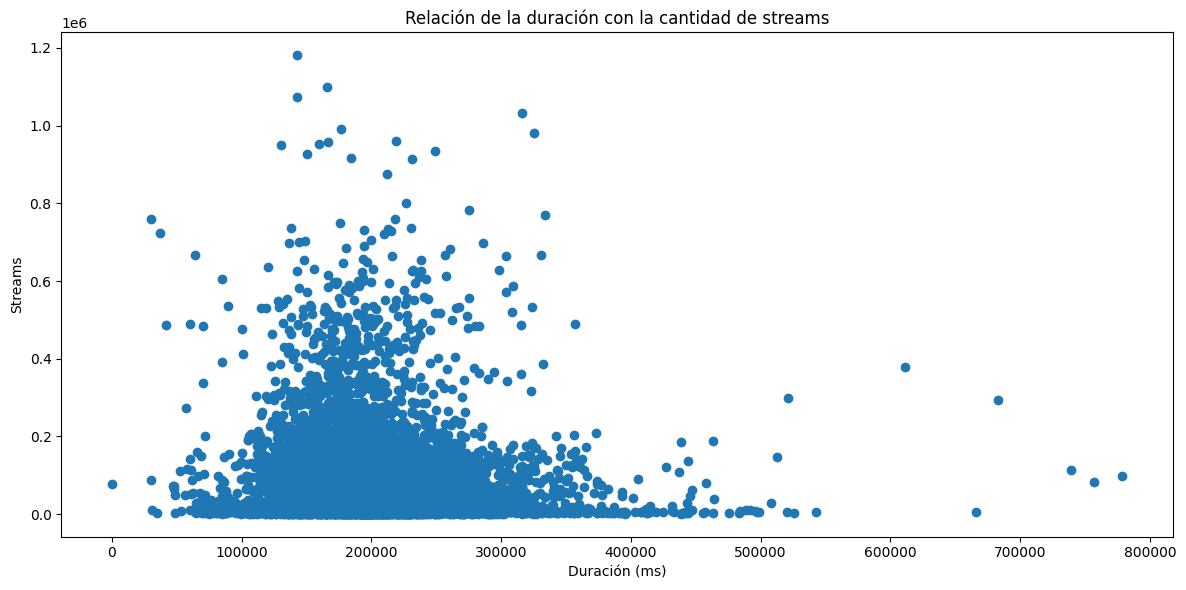

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(x='duration_ms', y='streams', data=df_spotify_duracion)
plt.title('Relación de la duración con la cantidad de streams')
plt.xlabel('Duración (ms)')
plt.ylabel('Streams')
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se solapen
plt.show()

Al comparar con la cantidad de streams que tienen las canciones, se puede ver que el concentrado de los valores más altos se encuentran en entre el mismo rango que antes, quizás se puede acotar aún más a las canciones entre 1 y 3 minutos. 

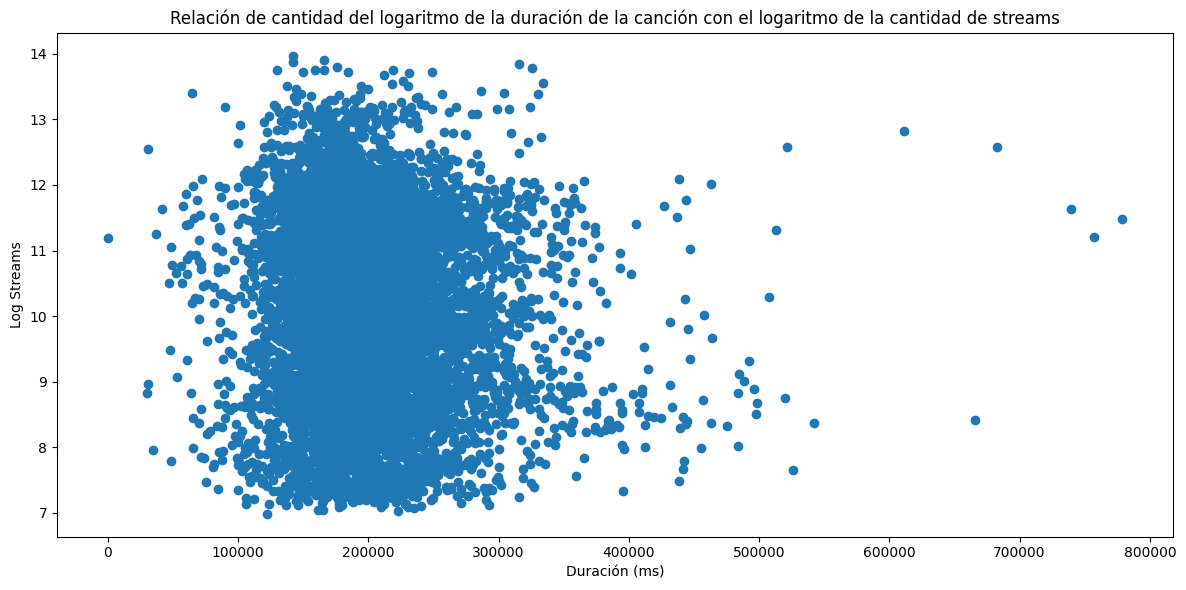

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(x='duration_ms', y='streams_log', data=df_spotify_duracion)
plt.title('Relación de cantidad del logaritmo de la duración de la canción con el logaritmo de la cantidad de streams')
plt.xlabel('Duración (ms)')
plt.ylabel('Log Streams')
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se solapen
plt.show()

Al aplicarle el logaritmo a la cantidad de streams que tiene una canción, se puede preciar mejor la concentración que presentan las filas para el atributo de duración. 

A continuaciónn se va a explorar el comportamiento que tiene la cantidad de mercados en los que está disponible la canción en comparación con la popularidad de esta

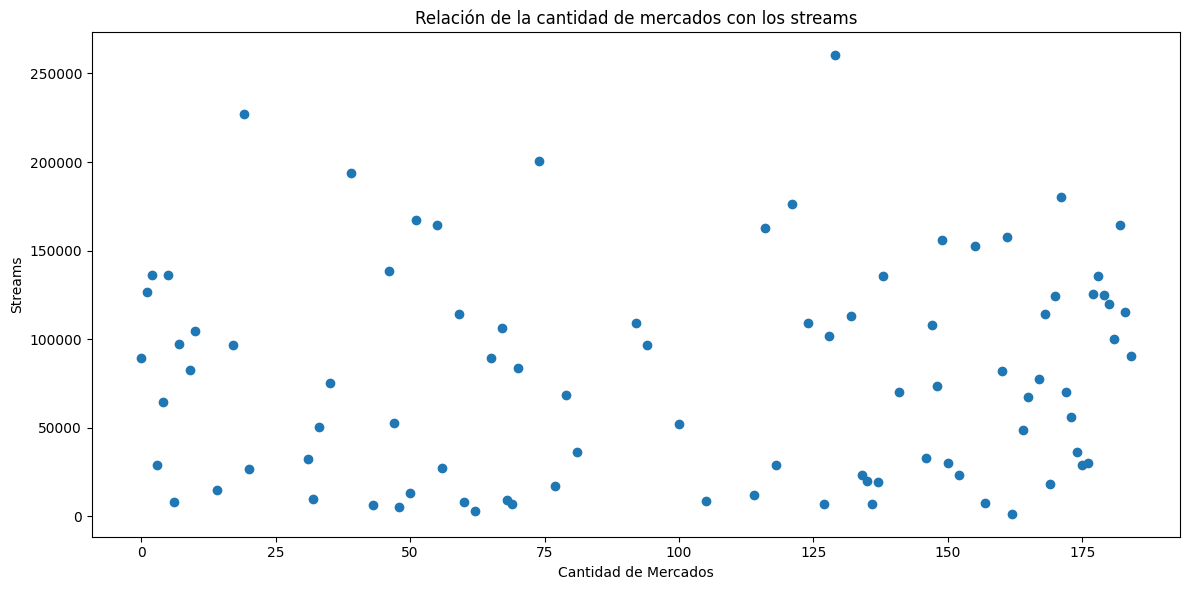

In [21]:
def cant_available_markets(row):
  """Applies the specified string manipulation and split to the available_markets column."""
  return len(row['available_markets'].replace("'", "").replace("[","").replace("]","").split(", ")) - 1 

# Apply the function to create a new column with the processed data
df_spotify['cant_markets'] = df_spotify.apply(cant_available_markets, axis=1)

df_mercados_popu = df_spotify.groupby("cant_markets").agg({"popularity": 'mean', "streams":"mean"}).reset_index()
df_mercados_popu

plt.figure(figsize=(12, 6))
plt.scatter(x='cant_markets', y='streams', data=df_mercados_popu)
plt.title('Relación de la cantidad de mercados con los streams')
plt.xlabel('Cantidad de Mercados')
plt.ylabel('Streams')
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se solapen
plt.show()

A partir del gráfico mostrado anteriormente, queda la interrogante de cuales son las regiones que más streams tienen, considerando que el gráfico es bastante "parejo" alo largo del eje x, lo que diverge de la intuición. Se podría esperar que la función se comportara exponencialmente, comenzando de pocos streams y llegando a un nivel muy elevado. 

In [23]:
df_spotify.sort_values(by="cant_markets", ascending=True)[["title", "rank", "artist", "region", "available_markets", "streams", "streams_log", "cant_markets"]].head(10)

,title,rank,artist,region,available_markets,streams,streams_log,cant_markets
245697,Blinding Lights,1,The Weeknd,Australia,['KR'],274569.0,12.522958,0
245707,Sunday Best,11,Surfaces,Australia,[],146090.0,11.891978,0
245716,Falling,20,Trevor Daniel,Australia,[],123494.0,11.723948,0
245721,Rushing Back,25,"Flume, Vera Blue",Australia,[],113819.0,11.642365,0
245722,Memories,26,Maroon 5,Australia,['KR'],113471.0,11.639303,0
245767,Lass los,21,"Dhurata Dora, Azet",Austria,[],14867.0,9.606899,0
245610,真的傻 (電影《一吻定情》追愛版主題曲),11,LaLa Hsu,Taiwan,[],24803.0,10.118720,0
245615,浪流連,16,EggPlantEgg,Taiwan,[],23592.0,10.068663,0
1008871,you broke me first,22,Tate McRae,United Kingdom,[],175311.0,12.074317,0
1008809,Roses - Imanbek Remix,10,SAINt JHN,United Arab Emirates,[],5729.0,8.653296,0


Mediante exploración más en detalle del data set, se puede ver que hay canciones que no tienen especificado el mercado en el que están disponibles, por lo que se concluye que no se puede utilizar este atributo como base para el análisis. 

# Experimentos:

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

import requests
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

## Pregunta 1:
- ¿Es posible predecir la felicidad (positividad) de una canción en función de la popularidad (u otros parametros)?

### Prediciendo con solo popularidad

En una primera instancia, se experimentará solo usando los atributos "streams" y "popularity" para intentar predecir "af_valence" (el cual representa la positividad o felicidad). Esto se debe a que, de todos los atributos, son estos dos los que se asocian con la popularidad de una canción dada.

In [5]:
df_util_1 = df_spotify[["streams", "popularity", "af_valence"]].copy()

In [6]:
df_util_1

,streams,popularity,af_valence
0,28838.0,44.0,0.251
1,22249.0,1.0,0.393
2,218751.0,64.0,0.822
3,193855.0,74.0,0.453
4,179042.0,72.0,0.055
...,...,...,...
1009045,11984.0,22.0,0.855
1009046,11904.0,53.0,0.025
1009047,11894.0,45.0,0.227
1009048,11751.0,0.0,0.669


Se define una función que permitirá convertir los valores numéricos reales del atributo "af_valence" en etiquetas de texto mediante intervalos.

In [7]:
def apply_etiqueta(elemento):
    if (elemento <= 0.25):
        return "Low"
    elif (elemento > 0.25) & (elemento <= 0.5):
        return "Medium-Low"
    elif (elemento > 0.5) & (elemento <= 0.75):
        return "Medium-High"
    else:
        return "High"

Procedemos a separar la positividad de los datos y a convertirla en etiquetas.
Tambien escalamos el resto de los atributos para normalizar y mejorar el cálculo de distancias.

In [8]:
df_etiquetado_1 = df_util_1.copy()

df_etiquetado_1["af_valence"] = df_etiquetado_1["af_valence"].apply(apply_etiqueta)
X_1 = df_etiquetado_1.drop(columns = 'af_valence')
y_1 = df_etiquetado_1["af_valence"]

X_scaled_1 = pd.DataFrame(StandardScaler().fit_transform(X_1), columns = X_1.columns)

In [9]:
X_scaled_1

,streams,popularity
0,-0.209665,-0.391136
1,-0.228652,-1.953110
2,0.337597,0.335363
3,0.265856,0.698613
4,0.223170,0.625963
...,...,...
1009045,-0.258232,-1.190286
1009046,-0.258463,-0.064212
1009047,-0.258492,-0.354812
1009048,-0.258904,-1.989435


Hacemos la separación del conjunto de datos de entrenamiento y el de validación, asegurándose de balancear las clases con stratify.

In [10]:
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X_scaled_1, y_1, test_size=0.3, random_state=0, stratify=y_1)

### Dummy Classifier

Para poder comparar los resultados obtenidos con otros clasificadores con una línea base conocida, se ejecuta una predicción con un dummy classifier.

In [ ]:
dummy_clf = DummyClassifier(strategy = 'stratified')

dummy_clf.fit(X_train_1, y_train_1)

y_pred_1 = dummy_clf.predict(X_val_1)

print(classification_report(y_val_1, y_pred_1))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(dummy_clf, X_scaled_1, y_1, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(3))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(3))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(3))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(3))


              precision    recall  f1-score   support

        High       0.19      0.19      0.19     58190
         Low       0.17      0.17      0.17     52533
 Medium-High       0.36      0.36      0.36    109647
  Medium-Low       0.27      0.27      0.27     82345

    accuracy                           0.27    302715
   macro avg       0.25      0.25      0.25    302715
weighted avg       0.27      0.27      0.27    302715

Resultados de 10-way Cross-Validation

precision_macro promedio:  0.25
recall_macro promedio:  0.25
accuracy promedio:  0.273
f1_macro promedio:  0.25


### K-Nearest Neighbors

Se comienza realizando una búsqueda para encontrar los parámetros más idóneos con GridSearchCV.

Consideramos el numero de vecinos entre 1 y 16, y la distribucion de pesos asociado a las distancias con 'uniform' o 'distance'

In [18]:
#Seed para permitir reproducibilidad
np.random.seed(42)

tuned_parameters = {'n_neighbors': list(range(1, 16, 1)), 'weights': ['uniform', 'distance']}

#Como lidiamos con multiples clases y no solo un par, se hace necesario usar f1_macro en vez de f1
score = 'f1_macro'

cls = KNeighborsClassifier(n_jobs = -1)

#Hacemos 10 iteraciones de cross validation adicionalmente.
clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train_1, y_train_1)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejor combinación de parámetros:
{'n_neighbors': 15, 'weights': 'uniform'}


In [20]:
kn_clf_15 = KNeighborsClassifier(n_neighbors=15, weights = 'uniform', n_jobs = -1)

kn_clf_15.fit(X_train_1, y_train_1)

y_pred_1 = kn_clf_15.predict(X_val_1)

print(classification_report(y_val_1, y_pred_1))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(kn_clf_15, X_scaled_1, y_1, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(3))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(3))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(3))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(3))

              precision    recall  f1-score   support

        High       0.42      0.40      0.41     58190
         Low       0.39      0.30      0.34     52533
 Medium-High       0.50      0.60      0.55    109647
  Medium-Low       0.49      0.44      0.46     82345

    accuracy                           0.47    302715
   macro avg       0.45      0.44      0.44    302715
weighted avg       0.46      0.47      0.46    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.429
recall_macro promedio:  0.418
accuracy promedio:  0.448
f1_macro promedio:  0.421


Los resultados no son terribles y superan a los conseguidos con dummy, pero tampoco son buenos. En ningun caso logramos scores mayores a 0.5

### Decision Tree

Nuevamente se optimizan los parámetros de entrada con GridSearchCV.

Esta vez los parametros utilizados son la profundidad máxima (Entre 1 y 16), y el criterio con el cual evaluar la calidad de los cortes ('gini' o 'entropy')

In [21]:
tuned_parameters = {'max_depth': list(range(1, 16, 1)), 'criterion': ['gini', 'entropy']}

score = 'f1_macro'
cls = DecisionTreeClassifier()

clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train_1, y_train_1)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

Mejor combinación de parámetros:
{'criterion': 'gini', 'max_depth': 15}


In [22]:
dtree_clf = DecisionTreeClassifier(max_depth = 15, criterion = 'gini')

dtree_clf.fit(X_train_1, y_train_1)

y_pred_1 = dtree_clf.predict(X_val_1)

print(classification_report(y_val_1, y_pred_1))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(dtree_clf, X_scaled_1, y_1, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(3))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(3))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(3))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(3))

              precision    recall  f1-score   support

        High       0.47      0.37      0.41     58190
         Low       0.49      0.20      0.29     52533
 Medium-High       0.49      0.65      0.56    109647
  Medium-Low       0.47      0.50      0.49     82345

    accuracy                           0.48    302715
   macro avg       0.48      0.43      0.44    302715
weighted avg       0.48      0.48      0.46    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.453
recall_macro promedio:  0.414
accuracy promedio:  0.461
f1_macro promedio:  0.417


Se obtienen resultados similares a los conseguidos con K-Nearest Neighbors, por lo que tampoco son nada del otro mundo. Puede ser conveniente revisitar este clasificador en el futuro.

### Naive Bayes

In [23]:
nb_clf = GaussianNB()

nb_clf.fit(X_train_1, y_train_1)

y_pred_1 = nb_clf.predict(X_val_1)

print(classification_report(y_val_1, y_pred_1))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(nb_clf, X_scaled_1, y_1, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(3))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(3))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(3))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(3))

/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and bein

              precision    recall  f1-score   support

        High       0.22      0.02      0.03     58190
         Low       0.00      0.00      0.00     52533
 Medium-High       0.37      0.85      0.52    109647
  Medium-Low       0.29      0.17      0.21     82345

    accuracy                           0.36    302715
   macro avg       0.22      0.26      0.19    302715
weighted avg       0.26      0.36      0.25    302715



/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and bein

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.214
recall_macro promedio:  0.26
accuracy promedio:  0.359
f1_macro promedio:  0.191


Aquí los resultados son terribles, incluso peores que los del dummy classifier. Hay etiquetas que no recibieron ninguna predicción. Este clasificador se descarta para el conjunto de datos utilizado.

### Support Vector Machines

In [24]:
#Como estamos trabajando con 1 millon de entradas, se escoge LinearSVC
svm_clf = LinearSVC()

svm_clf.fit(X_train_1, y_train_1)

y_pred_1 = svm_clf.predict(X_val_1)

print(classification_report(y_val_1, y_pred_1))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(svm_clf, X_scaled_1, y_1, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(3))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(3))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(3))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(3))

/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and bein

              precision    recall  f1-score   support

        High       0.29      0.00      0.00     58190
         Low       0.00      0.00      0.00     52533
 Medium-High       0.36      1.00      0.53    109647
  Medium-Low       0.00      0.00      0.00     82345

    accuracy                           0.36    302715
   macro avg       0.16      0.25      0.13    302715
weighted avg       0.19      0.36      0.19    302715



/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and bein

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.11
recall_macro promedio:  0.25
accuracy promedio:  0.362
f1_macro promedio:  0.133


Los resultados aqui iguales o incluso peores que los obtenidos con Naive Bayes. Este clasificador no sirve para este conjunto de datos, lo cual nos indica que no existen relaciones lineales entre parámetros.

### SGD Classifier

In [25]:
sgd_clf = SGDClassifier(n_jobs = -1)

sgd_clf.fit(X_train_1, y_train_1)

y_pred_1 = sgd_clf.predict(X_val_1)

print(classification_report(y_val_1, y_pred_1))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(sgd_clf, X_scaled_1, y_1, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(3))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(3))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(3))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(3))

/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and bein

              precision    recall  f1-score   support

        High       0.13      0.06      0.09     58190
         Low       0.20      0.30      0.24     52533
 Medium-High       0.00      0.00      0.00    109647
  Medium-Low       0.26      0.62      0.36     82345

    accuracy                           0.23    302715
   macro avg       0.15      0.25      0.17    302715
weighted avg       0.13      0.23      0.16    302715



/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/diego/Desarrollo/DCC/Codigo-DCC/Mineria-CC5205/Insight_Alchemist/.alchemist_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and bein

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.18
recall_macro promedio:  0.244
accuracy promedio:  0.248
f1_macro promedio:  0.171


En un intento de diversificar el uso de clasificadores, se probó con el uso de SGD (Stocastic Gradient Descent). Se obtuvieron resultados terribles que no nos sirven para la situacion dada.

Dado el conjunto limitado de atributos, el clasificador con el mejor desempeño fue Decision Tree. Sin embargo, los resultados dejan mucho que desear. Se puede concluir a priori que, basándose solo en los atributos asociados a la "popularidad", no es posible (al menos mediante los métodos descritos) hacer una predicción aceptable de la positividad de una canción.

### Ampliando el uso de atributos

Dado el mal desempeño anterior, se procede a ampliar el campo de atributos a utilizar.

Esta vez ademas de "streams" y "popularity", se utilizarán "af_danceability", "af_energy", "af_key", "af_loudness", "af_mode", "af_acousticness"

In [26]:
df_util_2 = df_spotify[["streams", "popularity", "af_danceability", "af_energy", "af_key", "af_loudness", "af_mode", "af_acousticness", "af_valence"]].copy()

In [27]:
df_util_2

,streams,popularity,af_danceability,af_energy,af_key,af_loudness,af_mode,af_acousticness,af_valence
0,28838.0,44.0,0.068,0.411,11.0,-10.319,0,0.043,0.251
1,22249.0,1.0,0.611,0.688,1.0,-5.688,10,0.264,0.393
2,218751.0,64.0,0.606,0.853,9.0,-2.975,10,0.237,0.822
3,193855.0,74.0,0.086,0.758,11.0,-0.516,10,0.021,0.453
4,179042.0,72.0,0.795,0.542,6.0,-8.106,0,0.903,0.055
...,...,...,...,...,...,...,...,...,...
1009045,11984.0,22.0,0.824,0.823,11.0,-2.718,0,0.197,0.855
1009046,11904.0,53.0,0.051,0.375,9.0,-9.185,10,0.813,0.025
1009047,11894.0,45.0,0.534,0.499,9.0,-10.601,0,0.416,0.227
1009048,11751.0,0.0,0.735,0.824,2.0,-3.483,0,0.706,0.669


Se hace el mismo proceso de etiquetado y escalado de la información que antes.

In [28]:
df_etiquetado_2 = df_util_2.copy()

df_etiquetado_2["af_valence"] = df_etiquetado_2["af_valence"].apply(apply_etiqueta)
X_2 = df_etiquetado_2.drop(columns = 'af_valence')
y_2 = df_etiquetado_2["af_valence"]

X_scaled_2 = pd.DataFrame(StandardScaler().fit_transform(X_2), columns = X_2.columns)

In [29]:
X_scaled_2

,streams,popularity,af_danceability,af_energy,af_key,af_loudness,af_mode,af_acousticness
0,-0.209665,-0.391136,-2.345716,-0.740317,1.487257,-1.676977,-1.086527,-1.226130
1,-0.228652,-1.953110,-0.088171,0.483934,-1.217273,-0.031738,0.920363,-0.374582
2,0.337597,0.335363,-0.108959,1.213180,0.946351,0.932100,0.920363,-0.478617
3,0.265856,0.698613,-2.270880,0.793311,1.487257,1.805701,0.920363,-1.310900
4,0.223170,0.625963,0.676817,-0.161339,0.134992,-0.890772,-1.086527,2.087586
...,...,...,...,...,...,...,...,...
1009045,-0.258232,-1.190286,0.797385,1.080590,1.487257,1.023404,-1.086527,-0.632744
1009046,-0.258463,-0.064212,-2.416394,-0.899425,0.946351,-1.274105,0.920363,1.740801
1009047,-0.258492,-0.354812,-0.408302,-0.351385,0.946351,-1.777162,-1.086527,0.211098
1009048,-0.258904,-1.989435,0.427364,1.085010,-0.946820,0.751625,-1.086527,1.328514


Se separan los conjuntos de entrenamiento y validación

In [30]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_scaled_2, y_2, test_size=0.3, random_state=0, stratify=y_2)

### Dummy Classifier

Establecemos un baseline

In [31]:
dummy_clf = DummyClassifier(strategy = 'stratified')

dummy_clf.fit(X_train_2, y_train_2)

y_pred_2 = dummy_clf.predict(X_val_2)

print(classification_report(y_val_2, y_pred_2))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(dummy_clf, X_scaled_2, y_2, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(3))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(3))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(3))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(3))

              precision    recall  f1-score   support

        High       0.19      0.19      0.19     58190
         Low       0.17      0.17      0.17     52533
 Medium-High       0.36      0.36      0.36    109647
  Medium-Low       0.27      0.27      0.27     82345

    accuracy                           0.27    302715
   macro avg       0.25      0.25      0.25    302715
weighted avg       0.27      0.27      0.27    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.249
recall_macro promedio:  0.249
accuracy promedio:  0.272
f1_macro promedio:  0.249


### K-nearest neighbors

Se comienza con una búsqueda y optimización de parámetros con GridSearchCV (Usando los mismo parámetros usados anteriormente para K-nearest neighbors)

In [32]:
tuned_parameters = {'n_neighbors': list(range(1, 16, 1)), 'weights': ['uniform', 'distance']}

score = 'f1_macro'

cls = KNeighborsClassifier(n_jobs = -1)

clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train_2, y_train_2)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

Mejor combinación de parámetros:
{'n_neighbors': 1, 'weights': 'uniform'}


In [33]:
kn_clf_1 = KNeighborsClassifier(n_neighbors=1, weights = 'uniform', n_jobs = -1)

kn_clf_1.fit(X_train_2, y_train_2)

y_pred_2 = kn_clf_1.predict(X_val_2)

print(classification_report(y_val_2, y_pred_2))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(kn_clf_1, X_scaled_2, y_2, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(3))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(3))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(3))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(3))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00     58190
         Low       1.00      1.00      1.00     52533
 Medium-High       1.00      1.00      1.00    109647
  Medium-Low       1.00      1.00      1.00     82345

    accuracy                           1.00    302715
   macro avg       1.00      1.00      1.00    302715
weighted avg       1.00      1.00      1.00    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.989
recall_macro promedio:  0.989
accuracy promedio:  0.989
f1_macro promedio:  0.989


Tras correr este experimento, sospechamos fuertemente que este modelo esta demasiado over-fitted al dataset con los atributos utilizados, o que la informacion provista al modelo es demasiada y se puede reducir.

Dado lo anterior, se decide reducir el scope de los atributos utilizados:

Esta vez sólo se utilizará: "streams", "popularity", "af_loudness" y "af_tempo"

In [34]:
df_util_3 = df_spotify[["streams", "popularity", "af_loudness", "af_tempo", "af_valence"]].copy()

In [35]:
df_util_3

,streams,popularity,af_loudness,af_tempo,af_valence
0,28838.0,44.0,-10.319,115.024,0.251
1,22249.0,1.0,-5.688,178.462,0.393
2,218751.0,64.0,-2.975,178.043,0.822
3,193855.0,74.0,-0.516,97.014,0.453
4,179042.0,72.0,-8.106,167.823,0.055
...,...,...,...,...,...
1009045,11984.0,22.0,-2.718,140.014,0.855
1009046,11904.0,53.0,-9.185,132.552,0.025
1009047,11894.0,45.0,-10.601,91.954,0.227
1009048,11751.0,0.0,-3.483,95.972,0.669


Se repite el proceso de etiquetado y escalado de los datos una vez más

In [36]:
df_etiquetado_3 = df_util_3.copy()

df_etiquetado_3["af_valence"] = df_etiquetado_3["af_valence"].apply(apply_etiqueta)
X_3 = df_etiquetado_3.drop(columns = 'af_valence')
y_3 = df_etiquetado_3["af_valence"]

X_scaled_3 = pd.DataFrame(StandardScaler().fit_transform(X_3), columns = X_3.columns)

In [37]:
X_scaled_3

,streams,popularity,af_loudness,af_tempo
0,-0.209665,-0.391136,-1.676977,0.027485
1,-0.228652,-1.953110,-0.031738,1.497668
2,0.337597,0.335363,0.932100,1.487958
3,0.265856,0.698613,1.805701,-0.389899
4,0.223170,0.625963,-0.890772,1.251108
...,...,...,...,...
1009045,-0.258232,-1.190286,1.023404,0.606631
1009046,-0.258463,-0.064212,-1.274105,0.433699
1009047,-0.258492,-0.354812,-1.777162,-0.507165
1009048,-0.258904,-1.989435,0.751625,-0.414047


In [38]:
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_scaled_3, y_3, test_size=0.3, random_state=0, stratify=y_3)

Se establece un baseline para evaluar los clasificadores:

### Dummy Classifier

In [39]:
dummy_clf = DummyClassifier(strategy = 'stratified')

dummy_clf.fit(X_train_3, y_train_3)

y_pred_3 = dummy_clf.predict(X_val_3)

print(classification_report(y_val_3, y_pred_3))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(dummy_clf, X_scaled_3, y_3, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(3))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(3))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(3))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(3))

              precision    recall  f1-score   support

        High       0.19      0.19      0.19     58190
         Low       0.18      0.18      0.18     52533
 Medium-High       0.36      0.36      0.36    109647
  Medium-Low       0.27      0.27      0.27     82345

    accuracy                           0.27    302715
   macro avg       0.25      0.25      0.25    302715
weighted avg       0.27      0.27      0.27    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.25
recall_macro promedio:  0.25
accuracy promedio:  0.272
f1_macro promedio:  0.25


### K-nearest neighbors

In [40]:
np.random.seed(42)

tuned_parameters = {'n_neighbors': list(range(1, 16, 1)), 'weights': ['uniform', 'distance']}

score = 'f1_macro'

cls = KNeighborsClassifier(n_jobs = -1)

clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train_3, y_train_3)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

Mejor combinación de parámetros:
{'n_neighbors': 1, 'weights': 'uniform'}


In [41]:
kn_clf_1 = KNeighborsClassifier(n_neighbors=1, weights = 'uniform', n_jobs = -1)

kn_clf_1.fit(X_train_3, y_train_3)

y_pred_3 = kn_clf_1.predict(X_val_3)

print(classification_report(y_val_3, y_pred_3))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(kn_clf_1, X_scaled_3, y_3, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(3))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(3))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(3))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(3))

              precision    recall  f1-score   support

        High       0.99      0.99      0.99     58190
         Low       0.99      0.99      0.99     52533
 Medium-High       0.99      0.99      0.99    109647
  Medium-Low       0.99      0.99      0.99     82345

    accuracy                           0.99    302715
   macro avg       0.99      0.99      0.99    302715
weighted avg       0.99      0.99      0.99    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.98
recall_macro promedio:  0.98
accuracy promedio:  0.98
f1_macro promedio:  0.98


Aun habiendo reducido el scope de atributos utilizados, el resultado esta demasiado ajustado a los datos.

En un último intento por mejorar la situación, se removerá el atributo "af_loudness" y se evaluará nuevamente los resultados.

Decidimos quedarnos con "af_tempo", pues es un valor que se puede medir experimentalmente de forma relativamente simple, y además porque "af_loudness" tiene correlaciones lineales directas con otros atributos que se encontraron en la fase exploratoria.

In [42]:
df_util_4 = df_spotify[["streams", "popularity", "af_tempo", "af_valence"]].copy()

In [43]:
df_util_4

,streams,popularity,af_tempo,af_valence
0,28838.0,44.0,115.024,0.251
1,22249.0,1.0,178.462,0.393
2,218751.0,64.0,178.043,0.822
3,193855.0,74.0,97.014,0.453
4,179042.0,72.0,167.823,0.055
...,...,...,...,...
1009045,11984.0,22.0,140.014,0.855
1009046,11904.0,53.0,132.552,0.025
1009047,11894.0,45.0,91.954,0.227
1009048,11751.0,0.0,95.972,0.669


Se etiquetan y escalan los datos por una última vez

In [44]:
df_etiquetado_4 = df_util_4.copy()

df_etiquetado_4["af_valence"] = df_etiquetado_4["af_valence"].apply(apply_etiqueta)
X_4 = df_etiquetado_4.drop(columns = 'af_valence')
y_4 = df_etiquetado_4["af_valence"]

X_scaled_4 = pd.DataFrame(StandardScaler().fit_transform(X_4), columns = X_4.columns)

In [45]:
X_scaled_4

,streams,popularity,af_tempo
0,-0.209665,-0.391136,0.027485
1,-0.228652,-1.953110,1.497668
2,0.337597,0.335363,1.487958
3,0.265856,0.698613,-0.389899
4,0.223170,0.625963,1.251108
...,...,...,...
1009045,-0.258232,-1.190286,0.606631
1009046,-0.258463,-0.064212,0.433699
1009047,-0.258492,-0.354812,-0.507165
1009048,-0.258904,-1.989435,-0.414047


Hacemos el corte de datos de entrenamiento y validación

In [46]:
X_train_4, X_val_4, y_train_4, y_val_4 = train_test_split(X_scaled_4, y_4, test_size=0.3, random_state=0, stratify=y_4)

Se establece el baseline:

### Dummy Classifier

In [47]:
dummy_clf = DummyClassifier(strategy = 'stratified')

dummy_clf.fit(X_train_4, y_train_4)

y_pred_4 = dummy_clf.predict(X_val_4)

print(classification_report(y_val_4, y_pred_4))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(dummy_clf, X_scaled_4, y_4, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(3))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(3))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(3))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(3))

              precision    recall  f1-score   support

        High       0.19      0.19      0.19     58190
         Low       0.17      0.17      0.17     52533
 Medium-High       0.36      0.36      0.36    109647
  Medium-Low       0.27      0.27      0.27     82345

    accuracy                           0.27    302715
   macro avg       0.25      0.25      0.25    302715
weighted avg       0.27      0.27      0.27    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.249
recall_macro promedio:  0.249
accuracy promedio:  0.272
f1_macro promedio:  0.249


### K-nearest neighbors

In [48]:
tuned_parameters = {'n_neighbors': list(range(1, 16, 1)), 'weights': ['uniform', 'distance']}

score = 'f1_macro'

cls = KNeighborsClassifier(n_jobs = -1)

clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train_4, y_train_4)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

Mejor combinación de parámetros:
{'n_neighbors': 2, 'weights': 'distance'}


In [49]:
kn_clf_2 = KNeighborsClassifier(n_neighbors=2, weights = 'distance', n_jobs = -1)

kn_clf_2.fit(X_train_4, y_train_4)

y_pred_4 = kn_clf_2.predict(X_val_4)

print(classification_report(y_val_4, y_pred_4))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(kn_clf_2, X_scaled_4, y_4, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(3))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(3))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(3))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(3))

              precision    recall  f1-score   support

        High       0.96      0.96      0.96     58190
         Low       0.95      0.95      0.95     52533
 Medium-High       0.96      0.96      0.96    109647
  Medium-Low       0.96      0.95      0.95     82345

    accuracy                           0.96    302715
   macro avg       0.96      0.96      0.96    302715
weighted avg       0.96      0.96      0.96    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.937
recall_macro promedio:  0.937
accuracy promedio:  0.939
f1_macro promedio:  0.937


### Decision Tree

Optimizamos los hiperparámetros con GridSearchCV (Los mismos mencionados con anterioridad)

In [50]:
tuned_parameters = {'max_depth': list(range(1, 16, 1)), 'criterion': ['gini', 'entropy']}
score = 'f1_macro'
cls = DecisionTreeClassifier()

clf = GridSearchCV(cls, param_grid = tuned_parameters, scoring = score, cv = 10)

clf.fit(X_train_4, y_train_4)

print("Mejor combinación de parámetros:")
print(clf.best_params_)

Mejor combinación de parámetros:
{'criterion': 'entropy', 'max_depth': 15}


In [51]:
dtree_clf = DecisionTreeClassifier(max_depth = 15, criterion = 'entropy')

dtree_clf.fit(X_train_4, y_train_4)

y_pred_4 = dtree_clf.predict(X_val_4)

print(classification_report(y_val_4, y_pred_4))

#Cross-Validation:
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(dtree_clf, X_scaled_4, y_4, cv=10, scoring=scoring)
pd.DataFrame.from_dict(cv_results)

print("Resultados de 10-fold Cross-Validation:")
print('')
print("precision_macro promedio: ", cv_results['test_precision_macro'].mean().round(3))
print("recall_macro promedio: ", cv_results['test_recall_macro'].mean().round(3))
print("accuracy promedio: ", cv_results['test_accuracy'].mean().round(3))
print("f1_macro promedio: ", cv_results['test_f1_macro'].mean().round(3))

              precision    recall  f1-score   support

        High       0.75      0.76      0.76     58190
         Low       0.78      0.56      0.65     52533
 Medium-High       0.69      0.83      0.76    109647
  Medium-Low       0.76      0.69      0.72     82345

    accuracy                           0.73    302715
   macro avg       0.75      0.71      0.72    302715
weighted avg       0.74      0.73      0.73    302715

Resultados de 10-fold Cross-Validation:

precision_macro promedio:  0.738
recall_macro promedio:  0.701
accuracy promedio:  0.725
f1_macro promedio:  0.713


Los resultados esta vez son buenos, pero sin llegar al nivel de sobreajuste que se presentaba en las situaciones anteriores. Se considera que K-Nearest neighbors es un buen modelo para responder a la pregunta planteada.

Dados estos resultados, la pregunta se puede reformular:

- ¿Es posible predecir la positividad de una canción basándose en su popularidad y tempo?

Proponemos el siguiente experimento para responder a ella:

1) Seleccionar "streams", "popularity" y "af_tempo" a partir del dataset cargado.

2) Aplicar una funcion de etiquetado a "af_valence" (positividad) para pasar desde decimales a etiquetas basadas en intervalos.

3) Aplicar un StandardScaler sobre "streams", "popularity" y "af_tempo" para normalizar las distancias entre puntos

4) Aplicar GridSearchCV sobre los parametros de K-Nearest neighbors y entrenar el clasificador

5) Correr 10-fold cross validation sobre el dataset, usando el clasificador escogido.

6) Evaluar los resultados con diversas metricas (a escoger)

## Pregunta 2:
- ¿Es posible asociar el valor de energía u otros parámetros de una canción, con la región geográfica en donde es más popular?

In [ ]:
df_P2 = df_spotify.copy()

Primero se modifica la información de la columna regiones para reducir las clases al agrupar los países por regiones geográficas más amplia.

In [ ]:
d1 = [
    (['Morocco','South Africa'],'Africa'),
    (['Argentina','Bolivia','Brazil','Chile','Colombia','Costa Rica','Dominican Republic','Ecuador','El Salvador','Guatemala','Honduras','Mexico','Nicaragua','Panama','Paraguay','Peru','Uruguay'],'America_latina'),
    (['Canada','United States'],'America_norte'),
    (['Hong Kong','India','Indonesia','Japan','Malaysia','Philippines','Singapore','Taiwan','Thailand','Vietnam'],'Asia'),
    (['Andorra','Austria','Belgium','Bulgaria','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Iceland','Ireland','Italy','Latvia','Lithuania','Luxembourg',
     'Netherlands','Norway','Poland','Portugal','Romania','Russia','Slovakia','Spain','Sweden','Switzerland','Ukraine','United Kingdom'],'Europa'),
    (['Australia','New Zealand'],'Oceania'),
    (['Egypt','Israel','Saudi Arabia','Turkey','United Arab Emirates'],'Oriente_medio')
]

def apply_etiqueta(elemento):
    for i in d1:
        if elemento in i[0]:
            return i[1]
        
new_reg = df_P2["region"]


for index, row in df_P2.iterrows():
    new_data = apply_etiqueta(row["region"])
    new_reg.iat[index] = new_data

#se reemplaza la columa de region
df_P2["region"] = new_reg


Para encontrar si esta relación existe se usará un Decision Tree Classifier.

Primero se prueba atributo por atributo para ver cuál tiene mejores resultados.

In [ ]:
for i in ['af_danceability','af_energy', 'af_key', 'af_loudness', 'af_mode', 'af_speechiness','af_acousticness', 'af_liveness', 'af_valence','af_tempo', 'af_time_signature']:

    df_P2 = df_P2.dropna(subset=["region", i])  # Drop rows where target or feature is NaN
    X = df_P2[i].copy().values.reshape(-1, 1)
    y = df_P2["region"]

    #primero separamos los datos de entrenamiento y validacion/test
    X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

    # Luego separamos los datos de validación y pruebas                                       0.5 x 0.3 = 0.15
    X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=0, stratify=y_val_and_test)

    #estandarizacion de datos, transformar los datos de manera que tengan media 0 y desviacion estandar 1.
    std_scaler = StandardScaler()
    X_train_std_scaled = std_scaler.fit_transform(X_train)

    X_val_std_scaled = std_scaler.transform(X_val)
    X_test_std_scaled = std_scaler.transform(X_test)

    #definimos nuestro modelo
    clf = DecisionTreeClassifier(criterion="gini",random_state=0)

    #entrenamos al modelo con fit
    clf.fit(X_train_std_scaled, y_train)   ## Entrenar usando X (features), y (clase)

    #realizamos predicciones de nuestros datos con los datos de validación
    y_val_pred = clf.predict(X_val_std_scaled)


    #metricas de las predicciones
    print(i)
    print(classification_report(y_val, y_val_pred))

af_danceability
                precision    recall  f1-score   support

        Africa       0.42      0.02      0.03      1785
America_latina       0.53      0.50      0.52     15151
 America_norte       0.88      0.00      0.01      1785
          Asia       0.52      0.26      0.35      8921
        Europa       0.51      0.80      0.62     25448
       Oceania       0.53      0.01      0.03      1785
 Oriente_medio       0.46      0.04      0.07      4462

      accuracy                           0.51     59337
     macro avg       0.55      0.23      0.23     59337
  weighted avg       0.52      0.51      0.46     59337

af_energy
                precision    recall  f1-score   support

        Africa       0.56      0.02      0.03      1785
America_latina       0.55      0.53      0.54     15151
 America_norte       0.31      0.01      0.02      1785
          Asia       0.51      0.28      0.36      8921
        Europa       0.52      0.80      0.63     25448
       Oceania    

c:\Users\diego\OneDrive\Escritorio\universidad\semestre10\mineria\T2\Insight_Alchemist\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\OneDrive\Escritorio\universidad\semestre10\mineria\T2\Insight_Alchemist\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\OneDrive\Escritorio\universidad\semestre10\mineria\T2\Insight_Alchemist\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in la

                precision    recall  f1-score   support

        Africa       0.00      0.00      0.00      1785
America_latina       0.00      0.00      0.00     15151
 America_norte       0.00      0.00      0.00      1785
          Asia       0.00      0.00      0.00      8921
        Europa       0.43      1.00      0.60     25448
       Oceania       0.00      0.00      0.00      1785
 Oriente_medio       0.00      0.00      0.00      4462

      accuracy                           0.43     59337
     macro avg       0.06      0.14      0.09     59337
  weighted avg       0.18      0.43      0.26     59337

af_loudness
                precision    recall  f1-score   support

        Africa       0.79      0.39      0.52      1785
America_latina       0.75      0.71      0.73     15151
 America_norte       0.55      0.12      0.20      1785
          Asia       0.75      0.57      0.65      8921
        Europa       0.64      0.88      0.74     25448
       Oceania       0.67      0

c:\Users\diego\OneDrive\Escritorio\universidad\semestre10\mineria\T2\Insight_Alchemist\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\OneDrive\Escritorio\universidad\semestre10\mineria\T2\Insight_Alchemist\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\OneDrive\Escritorio\universidad\semestre10\mineria\T2\Insight_Alchemist\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in la

                precision    recall  f1-score   support

        Africa       0.00      0.00      0.00      1785
America_latina       0.00      0.00      0.00     15151
 America_norte       0.00      0.00      0.00      1785
          Asia       0.00      0.00      0.00      8921
        Europa       0.43      1.00      0.60     25448
       Oceania       0.00      0.00      0.00      1785
 Oriente_medio       0.00      0.00      0.00      4462

      accuracy                           0.43     59337
     macro avg       0.06      0.14      0.09     59337
  weighted avg       0.18      0.43      0.26     59337

af_speechiness
                precision    recall  f1-score   support

        Africa       0.50      0.07      0.13      1785
America_latina       0.56      0.51      0.54     15151
 America_norte       0.24      0.00      0.00      1785
          Asia       0.49      0.25      0.33      8921
        Europa       0.52      0.82      0.64     25448
       Oceania       0.63    

c:\Users\diego\OneDrive\Escritorio\universidad\semestre10\mineria\T2\Insight_Alchemist\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\OneDrive\Escritorio\universidad\semestre10\mineria\T2\Insight_Alchemist\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\OneDrive\Escritorio\universidad\semestre10\mineria\T2\Insight_Alchemist\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in la

                precision    recall  f1-score   support

        Africa       0.00      0.00      0.00      1785
America_latina       0.00      0.00      0.00     15151
 America_norte       0.00      0.00      0.00      1785
          Asia       0.00      0.00      0.00      8921
        Europa       0.43      1.00      0.60     25448
       Oceania       0.00      0.00      0.00      1785
 Oriente_medio       0.00      0.00      0.00      4462

      accuracy                           0.43     59337
     macro avg       0.06      0.14      0.09     59337
  weighted avg       0.18      0.43      0.26     59337



De lo anterior se pude observar que las dos características que presentan mayor relación son loudness y tempo.

Ahora probamos con todas las características a la vez para ver si se encuentra un mejor resultado.

In [ ]:
df_P2 = df_P2.dropna(subset=["region", i])  # Drop rows where target or feature is NaN
X = df_P2[['af_danceability','af_energy', 'af_key', 'af_loudness', 'af_mode', 'af_speechiness','af_acousticness', 'af_liveness', 'af_valence','af_tempo', 'af_time_signature']].copy()
y = df_P2["region"]

#primero separamos los datos de entrenamiento y validacion/test
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

# Luego separamos los datos de validación y pruebas                                       0.5 x 0.3 = 0.15
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=0, stratify=y_val_and_test)

#estandarizacion de datos, transformar los datos de manera que tengan media 0 y desviacion estandar 1.
std_scaler = StandardScaler()
X_train_std_scaled = std_scaler.fit_transform(X_train)

X_val_std_scaled = std_scaler.transform(X_val)
X_test_std_scaled = std_scaler.transform(X_test)

#definimos nuestro modelo
clf = DecisionTreeClassifier(criterion="gini",random_state=0)

#entrenamos al modelo con fit
clf.fit(X_train_std_scaled, y_train)   ## Entrenar usando X (features), y (clase)

#realizamos predicciones de nuestros datos con los datos de validación
y_val_pred = clf.predict(X_val_std_scaled)


#metricas de las predicciones
print("todas")
print(classification_report(y_val, y_val_pred))

El resultado es mejor que cualquiera de los intentos individuales

Ahora se hará con los dos mejores resultados anteriores a la vez por si al agregar todos los dados se está perdiendo algo 

In [ ]:
df_P2 = df_P2.dropna(subset=["region", i])  # Drop rows where target or feature is NaN
X = df_P2[["af_loudness","af_tempo"]].copy()
y = df_P2["region"]

#primero separamos los datos de entrenamiento y validacion/test
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

# Luego separamos los datos de validación y pruebas                                       0.5 x 0.3 = 0.15
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=0, stratify=y_val_and_test)

#estandarizacion de datos, transformar los datos de manera que tengan media 0 y desviacion estandar 1.
std_scaler = StandardScaler()
X_train_std_scaled = std_scaler.fit_transform(X_train)

X_val_std_scaled = std_scaler.transform(X_val)
X_test_std_scaled = std_scaler.transform(X_test)

#definimos nuestro modelo
clf = DecisionTreeClassifier(criterion="gini",random_state=0)

#entrenamos al modelo con fit
clf.fit(X_train_std_scaled, y_train)   ## Entrenar usando X (features), y (clase)

#realizamos predicciones de nuestros datos con los datos de validación
y_val_pred = clf.predict(X_val_std_scaled)


#metricas de las predicciones
print("af_loudness y af_tempo")
print(classification_report(y_val, y_val_pred))

af_loudness y af_tempo
                precision    recall  f1-score   support

        Africa       0.94      0.48      0.64      1785
America_latina       0.82      0.75      0.78     15151
 America_norte       0.64      0.19      0.29      1785
          Asia       0.87      0.68      0.76      8921
        Europa       0.68      0.92      0.78     25448
       Oceania       0.83      0.25      0.39      1785
 Oriente_medio       0.86      0.38      0.52      4462

      accuracy                           0.75     59337
     macro avg       0.81      0.52      0.59     59337
  weighted avg       0.77      0.75      0.73     59337



La con mejor resultado sigue siendo loudness y key, al parecer al agregar el resto de los datos no suma ni resta al resultado por lo tanto tomares el de los dos mejores para el test.

In [ ]:
#realizamos predicciones de nuestros datos con los datos de validación
y_test_pred = clf.predict(X_test_std_scaled)


#metricas de las predicciones
print("todas")
print(classification_report(y_test, y_test_pred))


todas
                precision    recall  f1-score   support

        Africa       0.94      0.46      0.62      1785
America_latina       0.82      0.75      0.78     15151
 America_norte       0.64      0.17      0.27      1785
          Asia       0.88      0.67      0.76      8922
        Europa       0.68      0.92      0.78     25448
       Oceania       0.83      0.22      0.35      1785
 Oriente_medio       0.87      0.38      0.53      4461

      accuracy                           0.74     59337
     macro avg       0.81      0.51      0.59     59337
  weighted avg       0.77      0.74      0.73     59337



Se podría seguir experimentando al buscar alguna otra combinación de características que den un mejor resultado, pero toma demasiado tiempo al ser demasiadas combinaciones.

## Pregunta 3:
- ¿Qué parámetros son más adecuados para predecir la popularidad de una canción?

In [4]:
def remove_numbers(text):
    text = re.sub(r"[0-9]", " ", text)
    return " ".join(text.split())

def remove_unprintable_(text):
    printable = set(string.printable + "ñáéíóúü" + "ÑÁÉÍÓÚÜ")
    text = "".join(filter(lambda x: x in printable, text))
    return text

def remove_punctuation(text):
    pattern = re.compile(r"[^\w\sáéíóúüñÁÉÍÓÚÜÑ]")
    t = pattern.sub(r" ", text)
    return re.sub(" +", " ", t)

def reduce_spam(text):
    text = re.sub(r"(\w+)(\s+\1){2,}", r"\1", text)
    text = re.sub(r"(\w+\s+\w+)(\s+\1){2,}", r"\1", text)
    return text

def remove_vowels_accents(text):
    return (
        text.replace("á", "a")
        .replace("é", "e")
        .replace("í", "i")
        .replace("ó", "o")
        .replace("ú", "u")
        .replace("ü", "u")
    )

def remove_stopwords(text, stopwords_list):
    return " ".join(
        [word for word in str(text).split() if word not in stopwords_list]
    )

url = "https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt"
r = requests.get(url)

stopwords_list = r.text.splitlines()

def preprocesar(text):
    text = text.lower()
    text = remove_numbers(text)
    text = remove_unprintable_(text)
    text = remove_punctuation(text)
    text = reduce_spam(text)
    text = remove_stopwords(text, stopwords_list)
    text = remove_vowels_accents(text)
    return text.strip()

In [5]:
df_P3 = df_spotify.copy()

La idea del experimento asociado a la pregunta 3 es predecir la popularidad de la canción considerando su composición en términos numéricos, esto es considerando: valencia, tempo, acordes, ritmo, duración, etc. Se considera que hay información que no es relevante para la predicción como “url”, “track”, “album”, etc. Esta información no está incluida en el análisis, y debido a que el nombre del artista es una variable que influye directamente en la popularidad esta se excluye también. La única variable no numérica es “region”. 

Antes de realizar el preprocesamiento y posterior entrenamiento se determinan rangos de popularidad según los cuartiles de la popularidad en el dataset, con la intención de clasificar los datos en rangos de popularidad.
Se realiza un preprocesamiento para vectorizar el texto y se estandarizan los valores numéricos, se utiliza como modelo un random forest y todo esto se implementa en un pipeline como se detalla a continuación. 


Quitamos las columnas con información no relevante

In [6]:
df_P3=df_P3.drop(columns=['date','url','chart', 'track_id','available_markets','Año','Día','Column1','release_date','explicit','title','artist','trend','album','af_mode','rank','af_time_signature'])

Calculamos una medida para clasificar la popularidad por rangos

In [7]:
cuartiles = df_P3['popularity'].quantile([0.25, 0.5, 0.75])

Seleccionamos una muestra del dataset

In [8]:
df_2000 = df_P3.head(2000)

Definimos otra forma de escribir la popularidad

In [9]:
new_pop = df_2000['popularity']

Clasificamos la popularidad en rangos

In [10]:
for index, row in df_2000.iterrows():
    if row['popularity']>=cuartiles[0.75]:
        new_pop.iat[index] = 'High'
    elif row['popularity']>=cuartiles[0.50]:
        new_pop.iat[index] = 'Medium'
    elif row['popularity']>=cuartiles[0.25]:
        new_pop.iat[index] = 'Medium-Low'
    else:
        new_pop.iat[index] = 'Low'

C:\Users\franc\AppData\Local\Temp\ipykernel_13276\748377976.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Medium-Low' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_pop.iat[index] = 'Medium-Low'
C:\Users\franc\AppData\Local\Temp\ipykernel_13276\748377976.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pop.iat[index] = 'Medium-Low'
C:\Users\franc\AppData\Local\Temp\ipykernel_13276\748377976.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_pop.iat[index] = 'Low'
C:\Users\

Reemplazamos la columna de popularidad

In [11]:
df_2000['popularity'].astype(str)
df_2000['popularity'] = new_pop

C:\Users\franc\AppData\Local\Temp\ipykernel_13276\22764449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000['popularity'] = new_pop


Cambiamos la nueva clasificación a un número

In [12]:
le = LabelEncoder()
df_2000['popularity'] = le.fit_transform(df_2000['popularity'])

C:\Users\franc\AppData\Local\Temp\ipykernel_13276\1181775591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000['popularity'] = le.fit_transform(df_2000['popularity'])


In [13]:
features = ['region','streams','duration_ms', 'af_danceability', 'af_energy', 'af_key', 'af_loudness', 'af_speechiness', 
            'af_acousticness', 'af_instrumentalness', 'af_liveness', 'af_valence', 'af_tempo']

Preparamos el dataset para entrenar

In [14]:
X = df_2000[features]
y = df_2000['popularity']

In [15]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5, random_state=0, stratify=y_val_and_test)

Generamos un pipeline para:
- Transformar texto
- Estandarizar los datos
- Aplicar un clasificador (random forest)

In [16]:
# Define tus columnas
text_feature = 'region'
numeric_features = ['streams', 'duration_ms', 'af_danceability', 'af_energy', 'af_key', 
                    'af_loudness', 'af_speechiness', 'af_acousticness', 'af_instrumentalness', 
                    'af_liveness', 'af_valence', 'af_tempo']

# Crear la pipeline completa
clf_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('text', Pipeline([
                ('vectorizer', CountVectorizer(min_df=1, preprocessor = preprocesar)),
                ('to_dense', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True))
            ]), text_feature),
            ('num', StandardScaler(), numeric_features)
        ])),
    ('classifier', RandomForestClassifier(random_state=42))
])

Entrenamos

In [17]:
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer(preprocessor=<function preprocesar at 0x000001DA3AB40360>)),
                                                                  ('to_dense',
                                                                   FunctionTransformer(accept_sparse=True,
                                                                                       func=<function <lambda> at 0x000001DA1CA90040>))]),
                                                  'region'),
                                                 ('num', StandardScaler(),
                                                  ['streams', 'duration_ms',
                                                   'af_danceability',
                                                   'af_energy', 'af_key',
                                                   'af_loudness',
                                                   'af_speechiness',
                                                   'af_acousticness',
                                                   'af_instrumentalness',
                                                   'af_liveness', 'af_valence',
                                                   'af_tempo'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

predecimos 

In [18]:
y_pred = clf_pipeline.predict(X_test)

evaluamos la predicción

In [19]:
target_names = ['High', 'Low', 'Medium-High', 'Medium-Low']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        High       0.93      1.00      0.97       115
         Low       0.77      0.74      0.75        54
 Medium-High       0.94      0.90      0.92        67
  Medium-Low       0.75      0.72      0.74        64

    accuracy                           0.87       300
   macro avg       0.85      0.84      0.84       300
weighted avg       0.87      0.87      0.87       300



### Resultados: 
Podemos observar que se tiene buenos métricas para predecir que una canción tendrá una alta popularidad pero no tan buenas métricas para baja popularidad.

#### Camino a seguir
Para mejorar el análisis preliminar presentado anteriormento se reducirá la cantidad de parámetros a utilizar iterando con distintas combinaciones para poder encontrar el conjunto mínimo (o cercano a eso) que influyen directamente en la popularidad de una canción el modelo de clasificación a utilizar se mantendrá o en su defecto se utilizará uno en común para las tres preguntas. El análisis para el hito 3 será considerando todo el dataset y no solo una parte de él. 

### Replanteamiento de la pregunta

¿Cuál será la popularidad de una canción en una región debido a sus atributos?
